## Post Sentiment Classification Task

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

**Count Plot**

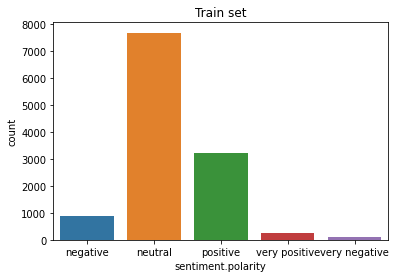

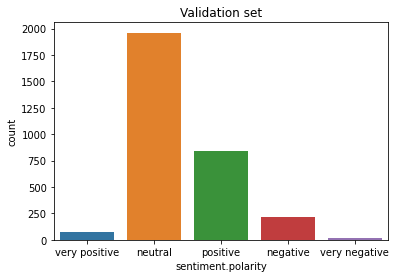

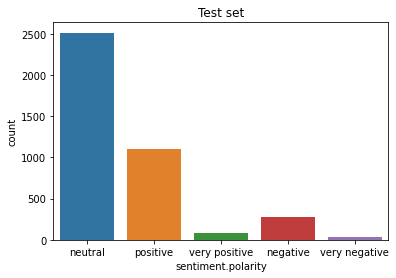

In [3]:
a=0
datasets = [train_data, validation_data, test_data] 
titles = ['Train set','Validation set','Test set']
for i in datasets:
    plt.title(titles[a])
    sns.countplot( x= 'sentiment.polarity', data = i)
    plt.show()
    a+=1

**Length of each data set**

In [4]:
a= 0 
for i in datasets:
    print('{} contains {} reviews'.format(titles[a],len(i)))
    print('The distribution of reviews are as follows,')
    print(i['sentiment.polarity'].value_counts())
    print('\n')
    a+=1

Train set contains 12138 reviews
The distribution of reviews are as follows,
neutral          7679
positive         3231
negative          878
very positive     253
very negative      97
Name: sentiment.polarity, dtype: int64


Validation set contains 3109 reviews
The distribution of reviews are as follows,
neutral          1961
positive          845
negative          215
very positive      73
very negative      15
Name: sentiment.polarity, dtype: int64


Test set contains 4016 reviews
The distribution of reviews are as follows,
neutral          2514
positive         1102
negative          282
very positive      86
very negative      32
Name: sentiment.polarity, dtype: int64




**Importing Spacy**

In [5]:
import spacy

# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
words = set(nltk.corpus.words.words())
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Tokenize and Normalize**

In [6]:
lemmatizer = WordNetLemmatizer()
#Tokenize
def spacy_tokenize(string):
    tokens = list()
    #string = " ".join(w for w in nltk.wordpunct_tokenize(string) if lemmatizer.lemmatize(w.lower()) in words or not w.isalpha())
    doc = nlp(string)
    for token in doc: 
        tokens.append(token)
    return tokens

#Normalize and Lemmatize
def normalize(tokens):
    normalized_tokens = list()
    for token in tokens:
        normalized = token.text.lower().strip()
        if (token.is_alpha or token.is_digit):
            normalized_tokens.append((normalized))
    return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
    return normalize(spacy_tokenize(string))

**Count Vectorizer One-hot encoding**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification on all subsets of our collection.
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

pd.DataFrame(train_features.toarray(), columns = one_hot_vectorizer.get_feature_names())

,0,00,000,0000,00005401,00005402,00005404,00005405,00005406,00005407,...,zyra,zyxel,zzbfbm,zābaki,águila,ļoti,ō,ψ,武田信玄,סּ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Count Vectorizer with TF-IDF vectorizer**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)

train_features_tfidf = tf_idf_vectorizer.fit_transform(train_data['body'])
validation_features_tfidf = tf_idf_vectorizer.transform(validation_data['body'])
test_features_tfidf = tf_idf_vectorizer.transform(test_data['body'])

pd.DataFrame(train_features_tfidf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,0,00,000,0000,00005401,00005402,00005404,00005405,00005406,00005407,...,zyra,zyxel,zzbfbm,zābaki,águila,ļoti,ō,ψ,武田信玄,סּ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels = le.fit_transform(train_data['sentiment.polarity'])
validation_labels = le.transform(validation_data['sentiment.polarity'])
test_labels = le.transform(test_data['sentiment.polarity'])

In [9]:
le.classes_

array(['negative', 'neutral', 'positive', 'very negative',
       'very positive'], dtype=object)

**Evaluation Metrics**

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, train_pred, train_labels, y_pred, test_labels):
    print('\t\t \033[1m'+ description + '\033[0m')
    print("\n\t\tEvaluation for training set \n")
    print(classification_report(train_pred, train_labels, digits=3, zero_division = 0, target_names=le.classes_))
    print('\nConfusion matrix:\n',confusion_matrix(train_labels, train_pred))
    print("\n\t\tEvaluation for test set \n")
    print(classification_report(y_pred, test_labels, digits=3, zero_division = 0, target_names=le.classes_))
    print('\nConfusion matrix:\n',confusion_matrix(test_labels, y_pred))

**Dummy Classifier**

In [11]:
from sklearn.dummy import DummyClassifier

**Dummy Classifier with strategy "stratified"**

In [12]:
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels) 
train_pred = dummy_prior.predict(train_features)
y_pred = dummy_prior.predict(test_features)
evaluation_summary('Dummy Classifier-Stratified',train_pred,train_labels, y_pred,test_labels)

		 Dummy Classifier-Stratified

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.077     0.078     0.078       876
      neutral      0.631     0.630     0.630      7690
     positive      0.270     0.268     0.269      3253
very negative      0.010     0.011     0.011        89
very positive      0.043     0.048     0.046       230

     accuracy                          0.477     12138
    macro avg      0.206     0.207     0.207     12138
 weighted avg      0.478     0.477     0.478     12138


Confusion matrix:
 [[  68  575  206    9   20]
 [ 555 4843 2085   54  142]
 [ 236 2041  872   25   57]
 [   6   61   29    1    0]
 [  11  170   61    0   11]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.082     0.086     0.084       266
      neutral      0.638     0.626     0.632      2563
     positive      0.252     0.255     0.254      1090
very negative      0.000   

**Dummy Classifier with strategy "most_frequent"**

In [13]:
dummy_prior = DummyClassifier(strategy='most_frequent')
dummy_prior.fit(train_features, train_labels)
train_pred = dummy_prior.predict(train_features)
y_pred = dummy_prior.predict(test_features)
evaluation_summary('Dummy Classifier-most_frequent',train_pred,train_labels, y_pred,test_labels)

		 Dummy Classifier-most_frequent

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.633     0.775     12138
     positive      0.000     0.000     0.000         0
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.633     12138
    macro avg      0.200     0.127     0.155     12138
 weighted avg      1.000     0.633     0.775     12138


Confusion matrix:
 [[   0  878    0    0    0]
 [   0 7679    0    0    0]
 [   0 3231    0    0    0]
 [   0   97    0    0    0]
 [   0  253    0    0    0]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.626     0.770      4016
     positive      0.000     0.000     0.000         0
very negative      0.000

**Logistic Regression with One hot vectorization**

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga',max_iter = 1000)
lr_model = lr.fit(train_features, train_labels)
train_pred = lr_model.predict(train_features)
y_pred = lr_model.predict(test_features)
evaluation_summary('LR-one hot',train_pred,train_labels, y_pred,test_labels)

		 LR-one hot

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.849     0.984     0.911       757
      neutral      0.995     0.952     0.973      8027
     positive      0.934     0.980     0.956      3080
very negative      0.629     1.000     0.772        61
very positive      0.834     0.991     0.906       213

     accuracy                          0.962     12138
    macro avg      0.848     0.981     0.904     12138
 weighted avg      0.966     0.962     0.963     12138


Confusion matrix:
 [[ 745  126    7    0    0]
 [   4 7640   35    0    0]
 [   5  206 3018    0    2]
 [   3   33    0   61    0]
 [   0   22   20    0  211]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.245     0.479     0.324       144
      neutral      0.875     0.778     0.824      2830
     positive      0.636     0.712     0.672       985
very negative      0.125     0.667     0.211

**Logistic Regression with TF-IDF vectorization**

In [18]:
lr_tf_idf = lr.fit(train_features_tfidf, train_labels)
train_pred = lr_tf_idf.predict(train_features_tfidf)
y_pred = lr_tf_idf.predict(test_features_tfidf)
evaluation_summary('LR-TF-IDF',train_pred, train_labels, y_pred,test_labels)

		 LR-TF-IDF

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.187     0.911     0.310       180
      neutral      0.978     0.795     0.877      9441
     positive      0.677     0.891     0.769      2454
very negative      0.041     1.000     0.079         4
very positive      0.221     0.949     0.359        59

     accuracy                          0.817     12138
    macro avg      0.421     0.909     0.479     12138
 weighted avg      0.901     0.817     0.844     12138


Confusion matrix:
 [[ 164  705    9    0    0]
 [   7 7507  165    0    0]
 [   2 1040 2186    0    3]
 [   7   86    0    4    0]
 [   0  103   94    0   56]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.089     0.625     0.155        40
      neutral      0.944     0.738     0.828      3213
     positive      0.516     0.758     0.614       751
very negative      0.000     0.000     0.000 

**SVC Classifier with One-Hot Vectorization**

In [22]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc_model = svc.fit(train_features,train_labels)
train_pred = svc_model.predict(train_features)
y_pred = svc_model.predict(test_features)
evaluation_summary('SVC-one hot',train_pred,train_labels, y_pred,test_labels)

		 SVC-one hot

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.286     0.996     0.444       252
      neutral      0.987     0.841     0.908      9017
     positive      0.814     0.919     0.863      2861
very negative      0.000     0.000     0.000         0
very positive      0.032     1.000     0.061         8

     accuracy                          0.863     12138
    macro avg      0.424     0.751     0.455     12138
 weighted avg      0.931     0.863     0.888     12138


Confusion matrix:
 [[ 251  616   11    0    0]
 [   0 7583   96    0    0]
 [   0  601 2630    0    0]
 [   1   96    0    0    0]
 [   0  121  124    0    8]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.014     0.800     0.028         5
      neutral      0.959     0.721     0.823      3342
     positive      0.468     0.771     0.583       669
very negative      0.000     0.000     0.00

**Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(train_features_tfidf,train_labels)
train_pred = dtc.predict(train_features_tfidf)
y_pred = dtc.predict(test_features_tfidf)
evaluation_summary('Decision Tree with TF-IDF',train_pred,train_labels, y_pred,test_labels)

		 Decision Tree with TF-IDF

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      1.000     1.000     1.000       878
      neutral      1.000     0.999     1.000      7686
     positive      0.998     1.000     0.999      3227
very negative      0.979     1.000     0.990        95
very positive      0.992     0.996     0.994       252

     accuracy                          0.999     12138
    macro avg      0.994     0.999     0.996     12138
 weighted avg      0.999     0.999     0.999     12138


Confusion matrix:
 [[ 878    0    0    0    0]
 [   0 7679    0    0    0]
 [   0    4 3226    0    1]
 [   0    2    0   95    0]
 [   0    1    1    0  251]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.379     0.437     0.406       245
      neutral      0.791     0.777     0.784      2560
     positive      0.604     0.605     0.605      1101
very negative      0.281     

**Best Baseline model based on f1 score is Decision tree**

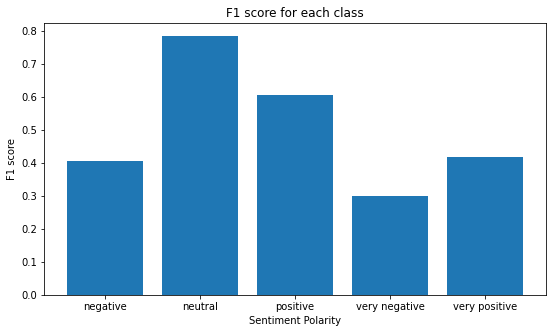

In [24]:
best_model_report = classification_report(y_pred, test_labels, digits=3, zero_division = 0, output_dict = True)
report_df = pd.DataFrame(best_model_report).transpose()
plt.figure(figsize=(9,5))
plt.bar(x=report_df.index[:5], height= report_df['f1-score'][:5])
plt.xticks([0,1,2,3,4],le.classes_)
plt.xlabel('Sentiment Polarity')
plt.ylabel('F1 score')
plt.title('F1 score for each class')
plt.show()

**Creating a pipeline**

In [12]:
#Base Line model
from sklearn.pipeline import Pipeline

prediction_pipeline = Pipeline([
              ('Tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize)),
              ('logreg', LogisticRegression(solver='saga', max_iter=8000))
              ])
prediction_pipeline.fit(train_data['body'], train_labels)
#val_pred = prediction_pipeline.predict(validation_data['body'])
#val_pred = prediction_pipeline.predict(validation_features_tfidf)
#evaluation_summary('LR-Tf-idf pipeline', val_pred,validation_labels)

Pipeline(steps=[('Tf-idf',
                 TfidfVectorizer(tokenizer=<function tokenize_normalize at 0x7fe349a99f80>)),
                ('logreg', LogisticRegression(max_iter=8000, solver='saga'))])

**Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

#Parameters to tune 
params = {
    'Tf-idf__sublinear_tf':(True,False),
    'Tf-idf__max_features': [1000,3000,4000,5000],
    'Tf-idf__max_df': (0.25, 0.5, 0.75),
    'Tf-idf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'logreg__C': [0.1,1,5,10], 
}

In [ ]:
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
grid_search.fit(train_data['body'], train_labels)

#get best parameters
grid_search.best_params_

In [27]:
tuned_pipeline = Pipeline([
              ('Tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize,max_features=3250,ngram_range=(1,1),max_df=0.75, sublinear_tf=False, smooth_idf=False)),
              ('logreg', LogisticRegression(solver='saga', max_iter=8000,C=10))
              ])
tuned_pipeline.fit(train_data['body'], train_labels)
train_pred = tuned_pipeline.predict(train_data['body'])
val_pred = tuned_pipeline.predict(test_data['body'])

evaluation_summary('LR-Tf-idf Hyper',train_pred,train_labels, val_pred,test_labels)

		 LR-Tf-idf Hyper

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.736     0.963     0.834       671
      neutral      0.974     0.913     0.943      8189
     positive      0.860     0.925     0.891      3003
very negative      0.649     0.955     0.773        66
very positive      0.806     0.976     0.883       209

     accuracy                          0.920     12138
    macro avg      0.805     0.946     0.865     12138
 weighted avg      0.928     0.920     0.922     12138


Confusion matrix:
 [[ 646  220   10    2    0]
 [  14 7478  186    1    0]
 [   6  442 2778    0    5]
 [   5   29    0   63    0]
 [   0   20   29    0  204]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.312     0.587     0.407       150
      neutral      0.893     0.799     0.843      2808
     positive      0.677     0.741     0.707      1007
very negative      0.156     0.833     

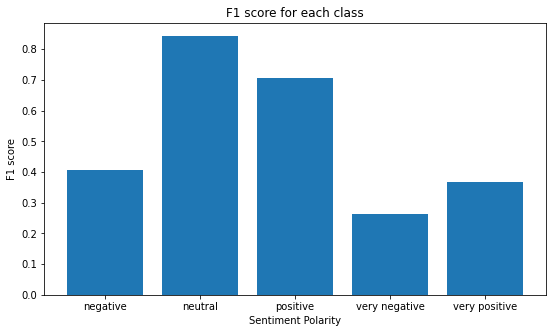

In [28]:
tuned_model_report = classification_report(val_pred, test_labels, digits=3, zero_division = 0, output_dict = True)
tuned_report = pd.DataFrame(tuned_model_report).transpose()
plt.figure(figsize=(9,5))
plt.bar(x=tuned_report.index[:5], height= tuned_report['f1-score'][:5])
plt.xticks([0,1,2,3,4],le.classes_)
plt.xlabel('Sentiment Polarity')
plt.ylabel('F1 score')
plt.title('F1 score for each class')

plt.show()

**Error Analysis**

In [29]:
err_df = test_data[['body','sentiment.polarity']].copy()
err_df['y_pred'] = le.inverse_transform(val_pred)

In [30]:
err_df['y_pred'].value_counts()

neutral          2808
positive         1007
negative          150
very positive      45
very negative       6
Name: y_pred, dtype: int64

In [31]:
pd.set_option('display.max_colwidth', None)
err_df[err_df['sentiment.polarity'] == 'very negative'][['body','y_pred']]

,body,y_pred
56,I hate you now.,negative
308,Sir! ADRIANA FUCKING LIMA is an 11. Where did you learn your math. Check yourself before you wreck yourself!,negative
543,"On the worst case, it couldn't restore (if you have really bad luck)",negative
631,edit: [Question]\n\nthis is NOT a tutorial.,neutral
763,"I am using a 7970M on a P170EM laptop, getting an AMD GPU was the worst decision i could have made with this laptop. I regret not looking deeper into it.",neutral
827,Chaox :(,neutral
868,Herpes.\n\n:(,neutral
961,"....I thought something was up, figured it was just in my head that they were sitting there for too long...Well, now I feel like a moron.",neutral
1208,The uncompleteable missions are a bit annoying but oh well.,negative
1401,that's the worst answer I've ever heard.,very negative


1. Looking at the very negative sentiments, I see a lot of things containing ' :( ' , which we removed, I think to us humans, we can understand this, may be replacing this sad face emoji, with a word like 'sadface' in the preprocessing step would have helped in increasing the accuracy.
2. Most of the very negative comments have been classified as neutral. I would have been happy, atleast if it was classified as Negative

In [32]:
pd.set_option('display.max_colwidth', None)
err_df[err_df['sentiment.polarity'] == 'very positive'][['body','y_pred']].head(30)

,body,y_pred
3,Wasn't that also an epic and awesome series? I remember it being one of the best series I had seen at that point.,very positive
49,Awesome album,very positive
102,"I’m an atheist but I like psalm 23, It’s quite a beautiful bit of writing. \n\nThis screen saver misunderstands its sentiment and misuses its poetry….\n",neutral
104,awesome,very positive
106,This is full of awesome !! I love it !! \n+Upvote,positive
143,Regardless I will keep consuming those minty mountains and that delightful rootbeer.,neutral
261,"""Is it made of people?""\n""Good question. No!""",positive
314,"No, but a perfect 10 beats 2 sixes anytime...Its a perfect 10 ;)",positive
386,Thank you! I will try updating those... I'm guessing the ones built into W7 aren't the best.,positive
396,The irony. If you dont talk.. you get reported for refusing to communicate with the team. LOL,positive


* Here also I find a lot emoji's and some are misclassified. 
* May assigning a value to most commonly used emoji's could help in sentiment classification

**Additional Features**

In [13]:
pd.set_option('display.max_colwidth', 10)
train_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relati...,My Fri...,t1_cy7...,https:...,Melodr...,It's a...,,False,2,t1_cy7...,negative,1.000000
1,relati...,My Fri...,t1_cy7...,https:...,Melodr...,I told...,elabor...,False,2,t1_cy7...,neutral,0.483631
2,relati...,My Fri...,t1_cy7...,https:...,TreatY...,Leeche...,answer,False,1,t3_3xshx9,positive,0.600000
3,relati...,My Fri...,t1_cy7...,https:...,Melodr...,I just...,elabor...,False,2,t1_cy7...,positive,0.475000
4,relati...,My Fri...,t1_cy7...,https:...,TreatY...,Good f...,apprec...,False,3,t1_cy7...,positive,0.744444
...,...,...,...,...,...,...,...,...,...,...,...,...
12133,reddit...,If I a...,t1_c1z...,https:...,,If you...,answer,False,1,t3_hzu51,neutral,0.000000
12134,reddit...,If I a...,t1_c1z...,https:...,TheCannon,If I c...,answer,False,1,t3_hzu51,neutral,0.000000
12135,reddit...,If I a...,t1_c1z...,https:...,alllie,I don'...,answer,False,1,t3_hzu51,negative,0.637202
12136,reddit...,If I a...,t1_c1z...,https:...,TheCannon,... Gi...,humor,False,2,t1_c1z...,neutral,0.000000


**Vectorizer with tuned parameters**

In [28]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize,max_features=3250,ngram_range=(1,1),max_df=0.75, sublinear_tf=False, smooth_idf=False)

train_features_ = tf_idf_vectorizer.fit_transform(train_data['body'])
validation_features_ = tf_idf_vectorizer.transform(validation_data['body'])
test_features_ = tf_idf_vectorizer.transform(test_data['body'])

In [20]:
#train_features_.shape
#pd.get_dummies(train_data['majority_type']).shape

(12138, 3250)

In [56]:
import scipy as sp
final = sp.sparse.hstack([train_features_, pd.get_dummies(train_data['majority_type'])])
final_test = sp.sparse.hstack([test_features_, pd.get_dummies(test_data['majority_type'])])
final = sp.sparse.hstack([final,sp.sparse.csr_matrix(train_data['sentiment.subjectivity']).T])
final_test = sp.sparse.hstack([final_test,sp.sparse.csr_matrix(test_data['sentiment.subjectivity']).T])

In [57]:
clf = LogisticRegression(solver='saga',max_iter = 8000,C=10)
clf = clf.fit(final, train_labels)
train_pred = clf.predict(final)
y_pred = clf.predict(final_test)
evaluation_summary('LR-TF-IDF',train_pred, train_labels, y_pred,test_labels)

		 LR-TF-IDF

		Evaluation for training set 

               precision    recall  f1-score   support

     negative      0.853     0.961     0.904       779
      neutral      0.974     0.956     0.965      7826
     positive      0.924     0.931     0.927      3207
very negative      0.938     0.978     0.958        93
very positive      0.885     0.961     0.922       233

     accuracy                          0.950     12138
    macro avg      0.915     0.958     0.935     12138
 weighted avg      0.951     0.950     0.950     12138


Confusion matrix:
 [[ 749  113   15    1    0]
 [  18 7479  178    1    3]
 [   7  234 2985    0    5]
 [   4    0    1   91    1]
 [   1    0   28    0  224]]

		Evaluation for test set 

               precision    recall  f1-score   support

     negative      0.436     0.609     0.508       202
      neutral      0.894     0.853     0.873      2634
     positive      0.750     0.746     0.748      1107
very negative      0.375     0.571     0.453 